In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

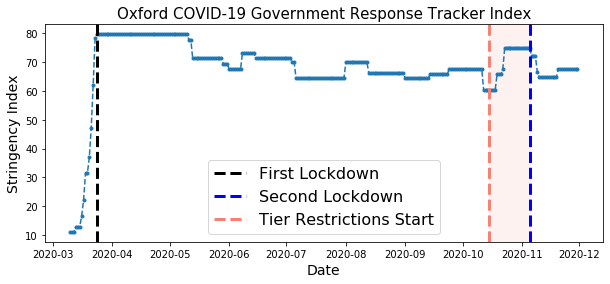

In [2]:
# root where data is and to store figures
root_data = '/Users/ignaciosacristanbarba/Documents/M4R/Data'
root_figures = '/Users/ignaciosacristanbarba/Documents/M4R/Figures'
 
# root where the Oxford data is 
root1 = root_data +'/oxford_index.xlsx'
df = pd.read_excel(root1)

# create dataframe from data
d = {'Date':df.iloc[:,0],'Index':df.iloc[:,1]}
df = pd.DataFrame(data=d)

# select only dates between start and end dates
start_date = '2020-03-10'
end_date = '2020-11-30'
mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
df = df.loc[mask]

# define the columns as separate variables to plot after
dates = df.iloc[:,0]
index = df.iloc[:,1]

# create date range
days = pd.date_range(start='2020-03-10', end='2020-11-30').date

# define the lockdown dates, nationals and tiered
lockdown_date = pd.to_datetime('20200324', format='%Y%m%d', errors='ignore')
lockdown_date_number = np.argwhere(days == lockdown_date).flatten()[0]

tiers_lockdown_date = pd.to_datetime('20201015', format='%Y%m%d', errors='ignore')
tiers_lockdown_date_number = np.argwhere(days == tiers_lockdown_date).flatten()[0]

second_lockdown_date = pd.to_datetime('20201105', format='%Y%m%d', errors='ignore')
lockdown_date_number = np.argwhere(days == second_lockdown_date).flatten()[0]

#plot index with corresponding lines
fig,ax = plt.subplots(1,figsize =(10,4))
ax.plot(dates,index,'.--')
ax.set_ylabel('Stringency Index',size = 14)
ax.set_xlabel('Date',size = 14)
ax.set_title('Oxford COVID-19 Government Response Tracker Index',size = 15)
ax.axvline(lockdown_date,linestyle='dashed', color = 'black',label = 'First Lockdown',linewidth=3)
ax.axvline(second_lockdown_date,linestyle='dashed', color = 'blue',label = 'Second Lockdown',linewidth=3)
ax.axvline(tiers_lockdown_date,linestyle='dashed', color = 'salmon',label = 'Tier Restrictions Start',linewidth=3)
ax.legend(fontsize = 16)
#ax.fill_between(x, tiers_lockdown_date, second_lockdown_date, where=y > theta,
#                facecolor='green', alpha=0.5, transform=trans)
ax.axvspan(tiers_lockdown_date, second_lockdown_date, alpha=0.1, color='salmon',label='Tier Restrictions')

fig.savefig(root_figures + '/oxford.pdf')

